## Fetch the Data

In [1]:
# Initial Python environment setup...
import numpy as np #Working with arrays
import pandas as pd #Read CSV file 
import matplotlib.pyplot as plt # Use to visualizations
from sklearn.linear_model import LinearRegression

In [2]:
train_df =  pd.read_csv('train.csv', nrows = 10000) #1000 will read it from train file 
train_df.dtypes #Print the datatype of the feature 

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [3]:
# Given a dataframe, add two new features 'abs_diff_longitude' and 'abs_diff_latitude' reprensenting the "Manhattan vector" 
#from the pickup location to the dropoff location.

def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    
add_travel_vector_features(train_df)

## Clean the Data

In [4]:
#Check the missing by varible 
print(train_df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
abs_diff_longitude    0
abs_diff_latitude     0
dtype: int64


In [5]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows') #(row/index) will be deleted if it contains at least NAN values  
print('New size: %d' % len(train_df))

Old size: 10000
New size: 10000


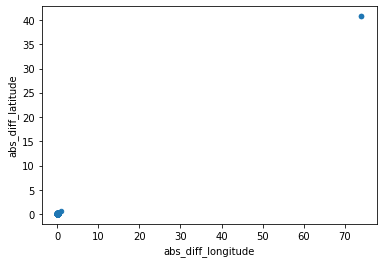

In [6]:
#Will visialize 2000 examples 
plot = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [7]:
#Remove examples that have extrem values such as 69
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.abs_diff_longitude < 5.0) & (train_df.abs_diff_latitude < 5.0)]
print('New size: %d' % len(train_df))

Old size: 10000
New size: 9987


## Training the Model

### 1. Normal Equation 

In [8]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into train and test subsets.

#Calulate the distance: from the pickup location to the dropoff location by using longitude & latitude
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

#Take a sequence of 1-D arrays and stack them as columns to make a single 2-D array --> convert input data into matrix
def get_input_matrix(df):
    return np.column_stack((df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))

#Calculate the loss function
def cost_function(X,Y,w):
    total_cost=0.0
    N=len(X)
    
    for i in range(N):
        total_cost+=(Y[i]-(w*X[i]))**2
    return  total_cost/(2*float(N))

#Read the train dataset
N_df =  pd.read_csv('train.csv', nrows = 1000000)

## Given a dataframe, add two new features 'abs_diff_longitude' and 'abs_diff_latitude' reprensenting the "Manhattan vector" 
#from the pickup location to the dropoff location.
add_travel_vector_features(N_df)

#(row/index) will be deleted if it contains at least NAN values
N_df = N_df.dropna(how = 'any', axis = 'rows')

#Remove examples that have extrem values
N_df = N_df[(N_df.abs_diff_longitude < 0.5) & (N_df.abs_diff_latitude < 0.5)]

#N_X matrix contains train data(input)
N_X = get_input_matrix(N_df)

#N_y is a vector contains output data
N_y = np.array(N_df['fare_amount'])

#Split arrays or matrices into train and test subsets.
#test_size:proportion of the dataset to include in the test split
N_X_train, N_X_test, N_y_train, N_y_test=train_test_split(N_X , N_y, test_size=0.2, random_state=3)

train_X = N_X_train
train_y =N_y_train

#Return the least-squares solution to a linear matrix equation.
(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None) 


test_X = N_X_test
test_y_predictions = np.matmul(test_X, w).round(decimals = 2)
train_y_predictions = np.matmul(train_X, w).round(decimals = 2)

c=np.sum(np.power((test_y_predictions  - N_y_test),2))/(2*len( N_y_test))
print(c)

#print(cost_function(N_X_train,N_y_train,w))

#print(mean_squared_error(test_y_predictions, N_y_test,squared=False))
#print(mean_squared_error(train_y_predictions, N_y_train,squared=False))

13.742994165848083


### 2.Gradient Descent

In [9]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

def get_input_matrix(df):
    return np.column_stack((df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))

N_df =  pd.read_csv('train.csv', nrows = 100000)

add_travel_vector_features(N_df)

N_df = N_df.dropna(how = 'any', axis = 'rows')
N_df = N_df[(N_df.abs_diff_longitude < 0.5) & (N_df.abs_diff_latitude < 0.5)]

N_X = get_input_matrix(N_df)
N_y = np.array(N_df['fare_amount'])


N_X_train, N_X_test, N_y_train, N_y_test=train_test_split(N_X , N_y, test_size=0.2, random_state=3)

#Function linear Regreation
l_reg = LinearRegression()

#Train the model
l_reg.fit(N_X_train, N_y_train)

#Enter the test data and predict the output 
y_pred = l_reg.predict(N_X_test)
print(y_pred)
#Calulate the cost of the train
#r1_score = l_reg.score(N_X_train,N_y_train)
#print(r1_score)

#Calucate the cost of the tes
#r2_score = l_reg.score(N_X_test,N_y_test)
#print(r2_score)

#print(mean_squared_error(N_y_test, y_pred,squared=False))

[ 7.45664592 11.15109142  7.05377892 ...  7.45930887 12.19878184
  7.32943598]


### 3. Decision Tree

In [12]:
# Using DT
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

def get_DT_input_matrix(df):
    return np.column_stack((df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,10,15,20,25,30,4]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5,6,7,8,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,5,6,7,8]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#read the data
DT_df =  pd.read_csv('train.csv', nrows = 100000)

#generate new features
add_travel_vector_features(DT_df)


DT_df = DT_df.dropna(how = 'any', axis = 'rows')

DT_df = DT_df[(DT_df.abs_diff_longitude < 0.5) & (DT_df.abs_diff_latitude < 0.5)]

DT_X = get_input_matrix(DT_df)

DT_y = np.array(DT_df['fare_amount'])

DT_X_train, DT_X_test, DT_y_train, DT_y_test=train_test_split(DT_X, DT_y, test_size=0.2, random_state=3)


model= RandomForestRegressor()

#rf_Grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

#rf_Grid.fit(DT_X_train, DT_y_train)

#rf_Grid.best_params_

#model= RandomForestRegressor(bootstrap= True,
# max_depth= 4,
# max_features= 'auto',
# min_samples_leaf= 1,
# min_samples_split= 5,
# n_estimators= 10)

model.fit(DT_X_train,DT_y_train)

print(model.score(DT_X_train,DT_y_train ))
print(model.score(DT_X_test,DT_y_test ))


0.9147332647682738
0.7013491040544229


In [36]:
train_df["date_parsed"] = pd.to_datetime(train_df["pickup_datetime"])

train_df["Year"] = train_df["date_parsed"].dt.year

train_df["Month"] = train_df["date_parsed"].dt.month

train_df["Weekday"] = train_df["date_parsed"].dt.weekday

train_df["hour"] = train_df["date_parsed"].dt.hour

train_df = train_df.drop(columns = ["pickup_datetime", "date_parsed"])

In [12]:
train_df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,Year,Month,Weekday,hour
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,2009,6,0,17
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,2010,1,1,16
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,2011,8,3,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,2012,4,5,4
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,2010,3,1,7


#### Does Month affects the Fare Amount?

<AxesSubplot:xlabel='Month', ylabel='count'>

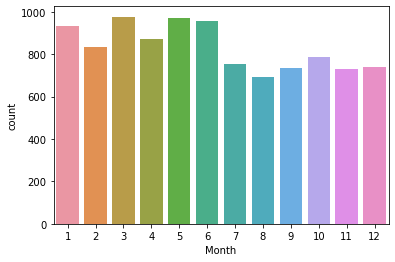

In [13]:
import seaborn as sns
sns.countplot(x = train_df["Month"])

#### Does Fare Amount Changed with Year?

<AxesSubplot:xlabel='Year', ylabel='count'>

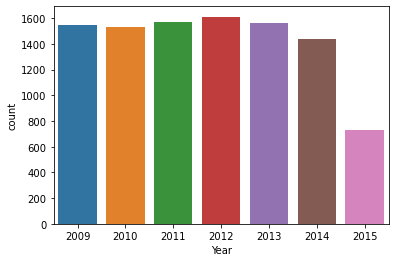

In [14]:
sns.countplot(x = train_df["Year"])

#### Does Hour affects the Fare Amount?

<AxesSubplot:xlabel='hour', ylabel='count'>

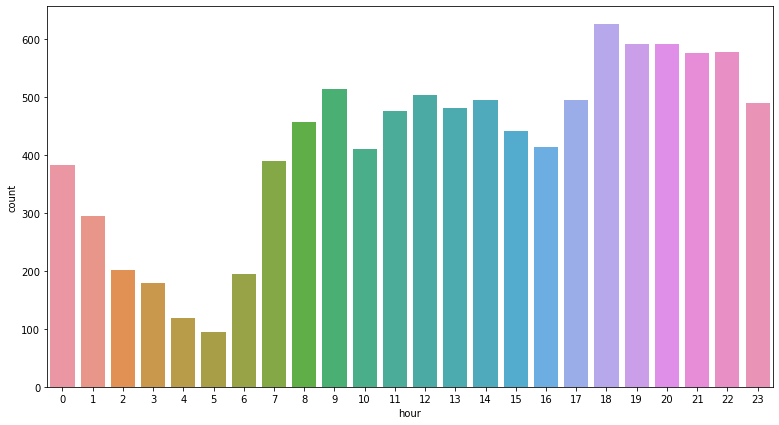

In [15]:
plt.figure(figsize=(13, 7))
sns.countplot(x = train_df["hour"])

#### Does number of Passengers affects the Fare Amount?

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

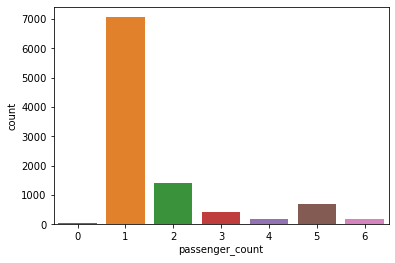

In [10]:
sns.countplot(x = train_df["passenger_count"])